In [40]:
import cv2
import os
import re
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np

In [6]:
GMM_dir = os.path.join("results", "GMM")
mask = cv2.imread("results/GMM/GMM_68.jpg") # cv2 read img as BGR
# cv2.imshow("mask",mask)
# cv2.waitKey()

In [3]:
# calculate orange pixels:
mask = cv2.inRange(mask,(20,20,20),(240,240,240) )
# cv2.imshow("mask",mask)
# cv2.waitKey()
none_black_pixel = cv2.countNonZero(mask)
print("here: ", none_black_pixel)

here:  1708


In [4]:
cv2.imshow("mask",mask)
cv2.waitKey(1)

-1

In [51]:
# GET a list of distance
dis_list = []
num_list= []

for img_name in os.listdir(GMM_dir):
    dis = int(re.search(r"GMM_([0-9]+)\.jpg",img_name)[1])
    mask = cv2.imread(os.path.join(GMM_dir, img_name))
    num_pixel = cv2.countNonZero(cv2.inRange(mask,(20,20,20),(240,240,240) ))
    dis_list.append(dis)
    num_list.append(num_pixel)

parames:  [8.02226662e+06 1.00000000e+00]


E:\ProgramData\Miniconda3\envs\cmsc426\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


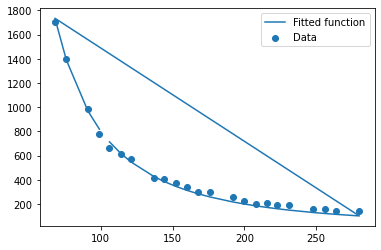

In [55]:
def inverse_square(x,a,b):
    return a*(1/np.power(int(b)*x, 2))


params, _ = optimize.curve_fit(inverse_square, dis_list,num_list)
print("parames: ", params)
plt.scatter(dis_list, num_list, label='Data')
plt.plot(dis_list, inverse_square(dis_list, params[0],params[1]),
         label='Fitted function')
plt.legend(loc='best')

plt.show()